In [1]:
#!pip autogluon
#!pip install autogluon.eda
#!pip install lightgbm


In [276]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.cluster import KMeans
import autogluon.eda.auto as auto
from autogluon.tabular import TabularPredictor
from autogluon.common import space
import lightgbm as lgb

In [277]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing
import sklearn.impute
import IPython
import os
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import mean_absolute_error
from scipy.optimize import minimize

In [278]:
from sklearn.preprocessing import LabelEncoder

In [257]:
# Load dataset
X_train, X_test, y_train, y_test = train_test_split(df_train.drop(['ID','Income'],axis=1), df_train['Income'], test_size=0.2, random_state=42)

# 각 칼럼마다 레이블 인코딩 적용========================================================================================================

# data type 이 object인 데이터만 리스트에 담기(반복문에 넣기 위해서)
encoding_target = list(X_train.dtypes[X_train.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()

    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    X_train[i] = X_train[i].astype(str)
    X_train[i] = X_train[i].astype(str)

    # 반드시 trian에만 fit 하고 test에는 fit하면 안됨(이유 궁금하면 찾아보세요)
    le.fit(X_train[i])
    X_train[i] = le.transform(X_train[i])

    # le.classes_에서 train에는 없지만 test 에만 있는 값이 있으면 le.classes_에 해당 값을 추가
    for case in np.unique(X_train[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    X_train[i] = le.transform(X_train[i])
# data type 이 object인 데이터만 리스트에 담기(반복문에 넣기 위해서)

encoding_target = list(X_test.dtypes[X_test.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()

    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    X_test[i] = X_test[i].astype(str)
    X_test[i] = X_test[i].astype(str)

    # 반드시 trian에만 fit 하고 test에는 fit하면 안됨(이유 궁금하면 찾아보세요)
    le.fit(X_test[i])
    X_test[i] = le.transform(X_test[i])

    # le.classes_에서 train에는 없지만 test 에만 있는 값이 있으면 le.classes_에 해당 값을 추가
    for case in np.unique(X_test[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    X_test[i] = le.transform(X_test[i])
# data type 이 object인 데이터만 리스트에 담기(반복문에 넣기 위해서)



# Train DecisionTreeRegressor
model = DecisionTreeRegressor(max_depth=5)  # Example depth, you can optimize this with HyperOpt
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Compute metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)



Mean Absolute Error (MAE): 405.34750744987974
Mean Squared Error (MSE): 507107.67383362236
Root Mean Squared Error (RMSE): 712.1149302139524


In [258]:
model.predict(X_test)

array([572.75078864,   0.        , 519.40826613, ...,   0.        ,
       904.20144753, 519.40826613])

In [259]:
X=df_train.query('Age>=15').query('Employment_Status!="Not Working"').loc[:,'Age':'Income_Status']
y=df_train.query('Age>=15').query('Employment_Status!="Not Working"')['Income']

In [261]:
df_train

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week,Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
1,TRAIN_00001,37,M,Associates degree (Vocational),Full-Time,52,Entertainment,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
2,TRAIN_00002,58,F,High graduate,Full-Time,52,Manufacturing (Non-durable),Admin Support (include Clerical),Black,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),3411,0,0,Under Median,860
3,TRAIN_00003,44,M,High graduate,Full-Time,52,Retail,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,850
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,TRAIN_19995,33,M,High graduate,Children or Armed Forces,52,Manufacturing (Durable),Handlers/Cleaners,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,1300
19996,TRAIN_19996,20,F,College,Full-Time,12,Education,Admin Support (include Clerical),White,Mexican-American,...,Native,US,Mexico,Mexico,Nonfiler,0,0,0,Under Median,850
19997,TRAIN_19997,22,M,College,Children or Armed Forces,52,Transportation,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Unknown,999
19998,TRAIN_19998,76,F,High graduate,Not Working,0,Not in universe or children,Unknown,White,All other,...,Native,US,Scotland,England,Single,0,0,0,Under Median,0


In [262]:
df_train.query('Age>=15').query('Employment_Status!="Not Working"').query('Working_Week != 0 or Age<=75').query('Employment_Status=="Full-Time" or Working_Week !=0')\
.query('Income_Status!="Under Median" or Education_Status!="High graduate"').query('Occupation_Status=="Sales" or Tax_Status!=("Married Filling Jointly both over 65 (MFJ)","Single","Head of Household (HOH)")')

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week,Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TRAIN_00000,63,M,Middle (7-8),Full-Time,4,Social Services,Services,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,425
4,TRAIN_00004,37,F,High graduate,Full-Time,52,Retail,Sales,White,All other,...,Native,US,US,US,Head of Household (HOH),0,0,0,Unknown,570
8,TRAIN_00008,24,F,Bachelors degree,Children or Armed Forces,52,Retail,Sales,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,0
13,TRAIN_00013,40,M,Elementary (1-4),Full-Time,52,Manufacturing (Durable),Machine Operators & Inspectors,White,Mexican (Mexicano),...,Foreign-born (Non-US Citizen),Mexico,Mexico,Mexico,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,800
14,TRAIN_00014,44,M,High graduate,Children or Armed Forces,52,Public Administration,Protective Services,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,200,Over Median,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19983,TRAIN_19983,36,M,College,Full-Time,52,Medical (except Hospitals),Professional,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,1150
19985,TRAIN_19985,39,M,College,Children or Armed Forces,52,Transportation,Transportation,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,1360
19987,TRAIN_19987,45,M,High graduate,Full-Time,52,Utilities & Sanitary,Machine Operators & Inspectors,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,40000,Over Median,2373
19991,TRAIN_19991,51,F,High graduate,Children or Armed Forces,48,Retail,Management,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,800


In [293]:
# 1 시작

In [294]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")

In [295]:
df_train.rename(columns={'Working_Week (Yearly)': 'Working_Week'}, inplace=True)
df_test.rename(columns={'Working_Week (Yearly)': 'Working_Week'}, inplace=True)


In [296]:
#2
X = df_train.query('Age>=15').rename({'Working_Week':'Working_Week'},axis=1)\
.query('Employment_Status!="Not Working"').query('Working_Week!= 0 or Age<80')\
.query('Occupation_Status != "Unknown"')
y = X.Income
XX = df_train.drop(X.index) #XX 는 걸러진 얘들 제거할 얘들
XX = XX.drop('ID',axis=1)
yy =  df_train.drop(X.index)['Income']# 12000 개 중 6000개가 0 임


In [297]:
#3
#autogluon#X.drop(['ID','Income'],axis=1,inplace=True)
#autogluon#X_train = X
X_test = df_test.query('Age>=15').rename({'Working_Week':'Working_Week'},axis=1)\
.query('Employment_Status!="Not Working"').query('Working_Week!= 0 or Age<80')\
.query('Occupation_Status != "Unknown"')

In [284]:
#4
#X_test
#df_test.drop(X_test.index)
#autogluon#X_test.drop('ID',axis=1,inplace=True)

In [298]:
#5
encoding_target = list(X_train.dtypes[X_train.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()

    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    X_train[i] = X_train[i].astype(str)
    X_train[i] = X_train[i].astype(str)

    # 반드시 trian에만 fit 하고 test에는 fit하면 안됨(이유 궁금하면 찾아보세요)
    le.fit(X_train[i])
    X_train[i] = le.transform(X_train[i])

    # le.classes_에서 train에는 없지만 test 에만 있는 값이 있으면 le.classes_에 해당 값을 추가
    for case in np.unique(X_train[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    X_train[i] = le.transform(X_train[i])
# data type 이 object인 데이터만 리스트에 담기(반복문에 넣기 위해서)

encoding_target = list(X_test.dtypes[X_test.dtypes == "object"].index)

for i in encoding_target:
    le = LabelEncoder()

    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    X_test[i] = X_test[i].astype(str)
    X_test[i] = X_test[i].astype(str)

    # 반드시 trian에만 fit 하고 test에는 fit하면 안됨(이유 궁금하면 찾아보세요)
    le.fit(X_test[i])
    X_test[i] = le.transform(X_test[i])

    # le.classes_에서 train에는 없지만 test 에만 있는 값이 있으면 le.classes_에 해당 값을 추가
    for case in np.unique(X_test[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    X_test[i] = le.transform(X_test[i])
# data type 이 object인 데이터만 리스트에 담기(반복문에 넣기 위해서)



In [299]:
from autogluon.tabular import  TabularDataset, TabularPredictor


In [286]:
predictr = GradientBoostingRegressor()
predictr.fit(X, y)
pred= predictr.predict(X_test)

GradientBoostingRegressor()

In [300]:
df_train = TabularDataset(X)
X_test = TabularDataset(X_test)

predictor = TabularPredictor('Income').fit(train_data=df_train,presets='best_quality')
predictions = predictor.predict(X_test)


No path specified. Models will be saved in: "AutogluonModels/ag-20240404_182245"
Presets specified: ['best_quality']
Stack configuration (auto_stack=True): num_stack_levels=1, num_bag_folds=8, num_bag_sets=1
Dynamic stacking is enabled (dynamic_stacking=True). AutoGluon will try to determine whether the input data is affected by stacked overfitting and enable or disable stacking as a consequence.
Detecting stacked overfitting by sub-fitting AutoGluon on the input data. That is, copies of AutoGluon will be sub-fit on subset(s) of the data. Then, the holdout validation data is used to detect stacked overfitting.
Sub-fit(s) time limit is: 3600 seconds.
Starting holdout-based sub-fit for dynamic stacking. Context path is: AutogluonModels/ag-20240404_182245/ds_sub_fit/sub_fit_ho.
Beginning AutoGluon training ... Time limit = 900s
AutoGluon will save models to "AutogluonModels/ag-20240404_182245/ds_sub_fit/sub_fit_ho"
=================== System Info ===================
AutoGluon Version:  1.

In [301]:
predictions

2       542.999451
3       480.645569
5       455.658325
6       428.621094
9       646.011169
           ...    
9994    533.191711
9995    638.444702
9996    614.654907
9997    398.608978
9999    499.373169
Name: Income, Length: 7673, dtype: float32

In [302]:
#7
# X_test의 인덱스를 기준으로 pred를 할당
pred_series = pd.Series(pred, index=X_test.index)
pred_series

# df_test에서 X_test에 해당하는 행을 제외하고 Income 값을 0으로 설정
df_test.loc[df_test.index.difference(X_test.index), 'Income'] = 0
df_test.loc[X_test.index, 'Income'] = pred_series
df_test

# X_test의 예측된 값으로 Income 열을 업데이트
df_test.loc[X_test.index, 'Income'] = pred_series

In [303]:
df_test

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week,Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TEST_0000,79,M,High Junior,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,Unknown,Unknown,Single,0,0,0,Under Median,0.000000
1,TEST_0001,47,M,Elementary (5-6),Children or Armed Forces,0,Not in universe or children,Unknown,White,Other Spanish,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0.000000
2,TEST_0002,18,F,High Junior,Children or Armed Forces,52,Retail,Services,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,423.700324
3,TEST_0003,39,F,Associates degree (Vocational),Full-Time,30,Medical (except Hospitals),Services,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Unknown,718.748136
4,TEST_0004,6,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,Mexican-American,...,Native,US,US,US,Nonfiler,0,0,0,Unknown,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TEST_9995,31,M,Bachelors degree,Children or Armed Forces,52,Other professional services,Technicians & Support,White,All other,...,Native,US,US,US,Single,0,0,0,Under Median,870.024530
9996,TEST_9996,27,M,College,Children or Armed Forces,52,Retail,Handlers/Cleaners,White,All other,...,Native,US,US,US,Married Filling Jointly both under 65 (MFJ),0,0,0,Under Median,761.258357
9997,TEST_9997,18,M,High graduate,Children or Armed Forces,7,Retail,Services,Black,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,362.311786
9998,TEST_9998,9,M,Children,Children or Armed Forces,0,Not in universe or children,Unknown,White,All other,...,Native,US,US,US,Nonfiler,0,0,0,Under Median,0.000000


In [ ]:
pred = predictr.predict(X_test)



In [307]:
predictions

2       542.999451
3       480.645569
5       455.658325
6       428.621094
9       646.011169
           ...    
9994    533.191711
9995    638.444702
9996    614.654907
9997    398.608978
9999    499.373169
Name: Income, Length: 7673, dtype: float32

In [309]:
#7
# X_test의 인덱스를 기준으로 pred를 할당
pred_series = pd.Series(predictions, index=X_test.index)
pred_series

# df_test에서 X_test에 해당하는 행을 제외하고 Income 값을 0으로 설정
df_test.loc[df_test.index.difference(X_test.index), 'Income'] = 0
df_test.loc[X_test.index, 'Income'] = pred_series
df_test

# X_test의 예측된 값으로 Income 열을 업데이트
df_test.loc[X_test.index, 'Income'] = pred_series

In [310]:
submission.Income = df_test.Income
submission.to_csv('lastlastlast1.csv',index=False)

In [247]:
df_train = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")
submission = pd.read_csv("sample_submission.csv")


In [248]:

X = df_train.query('Age>=15').rename({'Working_Week (Yearly)':'Working_Week_Yearly'},axis=1)\
.query('Employment_Status!="Not Working"').query('Working_Week_Yearly != 0 or Age<80')\
.query('Occupation_Status != "Unknown"').loc[:,'Age':'Income_Status']
y = df_train.query('Age>=15').rename({'Working_Week (Yearly)':'Working_Week_Yearly'},axis=1)\
.query('Employment_Status!="Not Working"').query('Working_Week_Yearly != 0 or Age<80')\
.query('Occupation_Status != "Unknown"').loc[:,'Income']

In [249]:
 encoding_target = [
 'Gender',
 'Education_Status',
 'Employment_Status',
 'Industry_Status',
 'Occupation_Status',
 'Race',
 'Hispanic_Origin',
 'Martial_Status',
 'Household_Status',
 'Household_Summary',
 'Citizenship',
 'Birth_Country',
 'Birth_Country (Father)',
 'Birth_Country (Mother)',
 'Tax_Status',
 'Income_Status']

In [250]:

################# 
for i in encoding_target:
    le = LabelEncoder()

    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    X[i] = X[i].astype(str)
    X[i] = X[i].astype(str)

    # 반드시 trian에만 fit 하고 test에는 fit하면 안됨(이유 궁금하면 찾아보세요)
    le.fit(X[i])
    X[i] = le.transform(X[i])

    # le.classes_에서 train에는 없지만 test 에만 있는 값이 있으면 le.classes_에 해당 값을 추가
    for case in np.unique(X[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    X[i] = le.transform(X[i])

for i in encoding_target:
    le = LabelEncoder()

    # train과 test 데이터셋에서 해당 열의 모든 값을 문자열로 변환
    df_test[i] = df_test[i].astype(str)
    df_test[i] = df_test[i].astype(str)

    # 반드시 trian에만 fit 하고 test에는 fit하면 안됨(이유 궁금하면 찾아보세요)
    le.fit(df_test[i])
    df_test[i] = le.transform(df_test[i])

    # le.classes_에서 train에는 없지만 test 에만 있는 값이 있으면 le.classes_에 해당 값을 추가
    for case in np.unique(df_test[i]):
        if case not in le.classes_:
            le.classes_ = np.append(le.classes_, case)
    df_test[i] = le.transform(df_test[i])
################# 

predictr = GradientBoostingRegressor()
predictr.fit(X,y)

XX = df_test.drop('ID',axis=1).rename({'Working_Week (Yearly)':'Working_Week_Yearly'},axis=1)
predictr.predict(XX)

df_test = df_test.assign(predict_income=predictr.predict(XX))
df_test = df_test.rename(columns={'predict_income': 'Income'})
#df_test


In [251]:
df_test.columns

Index(['ID', 'Age', 'Gender', 'Education_Status', 'Employment_Status',
       'Working_Week (Yearly)', 'Industry_Status', 'Occupation_Status', 'Race',
       'Hispanic_Origin', 'Martial_Status', 'Household_Status',
       'Household_Summary', 'Citizenship', 'Birth_Country',
       'Birth_Country (Father)', 'Birth_Country (Mother)', 'Tax_Status',
       'Gains', 'Losses', 'Dividends', 'Income_Status', 'Income'],
      dtype='object')

In [252]:

Real_test = df_test.query('Age >= 15').rename({'Working_Week (Yearly)': 'Working_Week'}, axis=1) \
    .query('Employment_Status != "Not Working"').query('Working_Week != 0 or Age < 80') \
    .query('Occupation_Status != "Unknown"')

UnReal_test = df_test.drop(Real_test.index)  # XX 는 걸러진 얘들 제거할 얘들
df_test.loc[UnReal_test.index, 'Income'] = 0
df_test.loc[Real_test.index, 'Income'] = Real_test.Income
df_test.loc[UnReal_test.index.difference(df_test.index), 'Income'] = 0
df_test

,ID,Age,Gender,Education_Status,Employment_Status,Working_Week (Yearly),Industry_Status,Occupation_Status,Race,Hispanic_Origin,...,Citizenship,Birth_Country,Birth_Country (Father),Birth_Country (Mother),Tax_Status,Gains,Losses,Dividends,Income_Status,Income
0,TEST_0000,79,3,26,8,0,38,29,9,10,...,7,80,81,83,11,0,0,0,4,622.274382
1,TEST_0001,47,3,24,8,0,38,29,9,18,...,7,80,80,82,10,0,0,0,4,734.139843
2,TEST_0002,18,2,26,8,52,43,26,9,10,...,7,80,80,82,11,0,0,0,4,680.131995
3,TEST_0003,39,2,18,10,30,36,26,9,10,...,7,80,80,82,8,0,0,0,5,884.705937
4,TEST_0004,6,3,20,8,0,38,29,9,16,...,7,80,80,82,10,0,0,0,5,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,TEST_9995,31,3,19,8,52,39,27,9,10,...,7,80,80,82,11,0,0,0,4,881.730855
9996,TEST_9996,27,3,21,8,52,43,19,9,10,...,7,80,80,82,8,0,0,0,4,919.032224
9997,TEST_9997,18,3,29,8,7,43,26,6,10,...,7,80,80,82,10,0,0,0,4,648.937575
9998,TEST_9998,9,3,20,8,0,38,29,9,10,...,7,80,80,82,10,0,0,0,4,0.000000


In [240]:
submission.Income = df_test.Income
submission.to_csv('정민이꺼.csv',index=False)

In [ ]:
df_test = 

,Age,Education_Status,Working_Week (Yearly),income_predict_final
0,79,9,0,0.000000
1,47,7,0,0.000000
2,18,9,52,439.639509
3,39,1,30,689.033283
4,6,3,0,0.000000
...,...,...,...,...
9995,31,2,52,741.221979
9996,27,4,52,784.460322
9997,18,12,7,360.543529
9998,9,3,0,0.000000


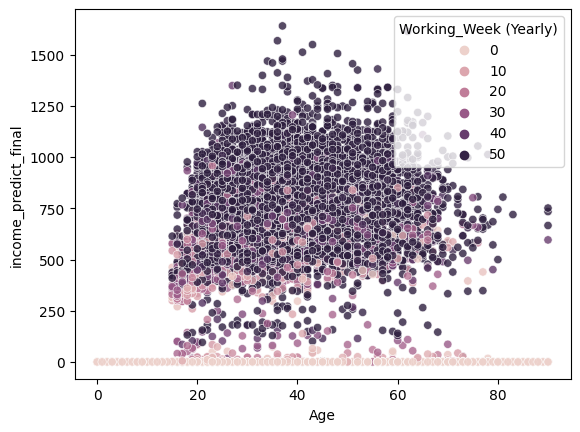

In [ ]:
def adjust_income(row):
    if row['Working_Week_yearly'] == 0:
        return 0
    else:
        return row['income_predict']

predict_data = df_test.assign(income_predict = predictr.predict(XX))\
.loc[:,['Age','Education_Status','Working_Week (Yearly)','income_predict']]\
.rename({'Working_Week (Yearly)':'Working_Week_yearly'},axis=1)\
.applymap(lambda x: 0 if x<0 else x)\
.apply(lambda x: 0 if x['Working_Week_yearly'] == 0 else x['income_predict'], axis=1)


test_final = df_test.assign(income_predict_final =predict_data)\
.loc[:,['Age','Education_Status','Working_Week (Yearly)','income_predict_final']]

sns.scatterplot(
    test_final,
    x='Age',
    y='income_predict_final',
    hue='Working_Week (Yearly)',
    alpha=0.8
)

test_final

<AxesSubplot: xlabel='Age', ylabel='prd'>

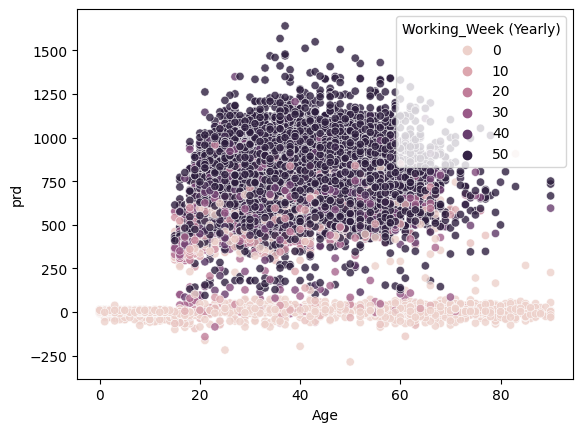

In [ ]:
sns.scatterplot(
    dft_,
    x='Age',
    y='prd',
    hue='Working_Week (Yearly)',
    alpha=0.8
)

In [ ]:
df = pd.DataFrame(dft_['prd']).applymap(lambda x:0 if x<0 else x).assign(Age=dft_['Age'])
df.loc[df['Age'] < 18, 'prd'] = 0
df.loc[df['Age'] > 80, 'prd'] = 0
df['prd']

0         5.297233
1         0.000000
2       439.639509
3       689.033283
4         0.000000
           ...    
9995    741.221979
9996    784.460322
9997    360.543529
9998      0.000000
9999    675.057068
Name: prd, Length: 10000, dtype: float64

In [ ]:
dft_.loc[:,['Age','prd']]

,Age,prd
0,79,5.297233
1,47,-32.309062
2,18,439.639509
3,39,689.033283
4,6,3.663552
...,...,...
9995,31,741.221979
9996,27,784.460322
9997,18,360.543529
9998,9,10.406999


In [ ]:
submission.assign(Income = df['prd']).to_csv('icprdct14',index=False)

In [ ]:
test_final

,Age,Education_Status,Employment_Status,Industry_Status,Working_Week (Yearly),income_predict_final
0,79,9,0,14,0,0.000000
1,47,7,0,14,0,0.000000
2,18,9,0,19,52,385.736678
3,39,1,2,12,30,873.390510
4,6,3,0,14,0,0.000000
...,...,...,...,...,...,...
9995,31,2,0,15,52,670.192365
9996,27,4,0,19,52,591.411658
9997,18,12,0,19,7,358.683759
9998,9,3,0,14,0,0.000000


In [ ]:
df_test.loc[:,['Age','Education_Status','Employment_Status','Industry_Status','Working_Week (Yearly)']]\
.rename({'Working_Week (Yearly)':'Working_Week_yearly'},axis=1)

,Age,Education_Status,Employment_Status,Industry_Status,Working_Week_yearly
0,79,9,0,14,0
1,47,7,0,14,0
2,18,9,0,19,52
3,39,1,2,12,30
4,6,3,0,14,0
...,...,...,...,...,...
9995,31,2,0,15,52
9996,27,4,0,19,52
9997,18,12,0,19,7
9998,9,3,0,14,0


<Axes: xlabel='Age', ylabel='Income'>

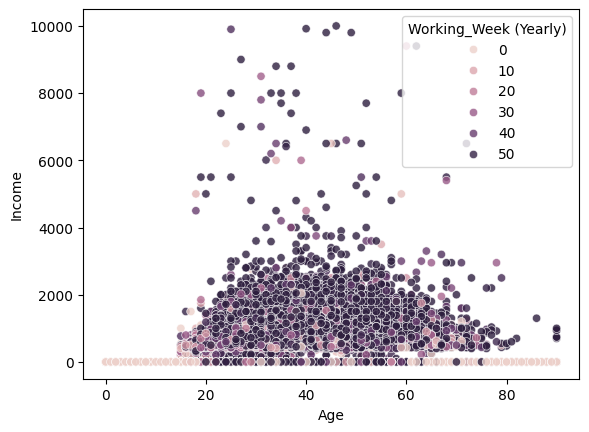

In [ ]:
sns.scatterplot(
    df_train,
    x='Age',
    y='Income',
    hue='Working_Week (Yearly)',
    alpha=0.8
)

In [ ]:
df_test.assign(income_predict = predictr.predict(XX))
sns.scatterplot(
    df_WY,
    x='Age',
    y='income_predict',
    alpha=0.8
)

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
X = df_train.loc[:,['Age','Education_Status','Employment_Status','Industry_Status','Working_Week (Yearly)']]
y = df_train.loc[:,['Income']]
XX = df_test.loc[:,['Age','Education_Status','Employment_Status','Industry_Status','Working_Week (Yearly)']]
y

,Income
0,425.0
1,0.0
2,860.0
3,850.0
4,570.0
...,...
4643,435.0
4644,0.0
4645,500.0
4646,760.0


In [ ]:
#선형회귀
predictr = sklearn.linear_model.LinearRegression()
predictr.fit(X,y)
predictr.predict(X)
predictr.predict(XX)
df = df_test.assign(income_predict = predictr.predict(XX)).loc[:,['Age','income_predict']]
# ---
df.loc[df['Age'] <= 18, 'income_predict'] = 0
df.loc[df['Age'] >= 80, 'income_predict'] = 0
df_WY = df.assign(Working_Week_Yearly = df_test['Working_Week (Yearly)'])
df_WY.loc[df_WY['Working_Week_Yearly'] == 0, 'income_predict'] = 0


ValueError: Input y contains NaN.

In [ ]:
submission.assign(Income = predictr.predict(XX)).to_csv('icprdct6',index=False)

In [ ]:
# GBM
predictr = GradientBoostingRegressor()
predictr.fit(X,y)
predictr.predict(X)
predictr.predict(XX)
df = df_test.assign(income_predict = predictr.predict(XX)).loc[:,['Age','income_predict']]

df.loc[df['Age'] <= 18, 'income_predict'] = 0
df.loc[df['Age'] >= 80, 'income_predict'] = 0
df_WY = df.assign(Working_Week_Yearly = df_test['Working_Week (Yearly)'])
df_WY.loc[df_WY['Working_Week_Yearly'] == 0, 'income_predict'] = 0

In [ ]:
df = df_test.assign(income_predict = predictr.predict(XX)).loc[:,['Age','income_predict']]